# Projeto 3 Ciência dos Dados

##### Matheus Pellizzon, Pedro Ramos, Thiago Verardo

Ánálise de um Data Frame de vinhos tintos

Necessário:

*pip install pandas-profiling==1.4.0*

Nosso grupo visa executar um classificador de qualidade de vinhos tintos. Para isso, deve-se, primeiramente, selecionar um data frame com um grande número de linhas e colunas, para que uma análise melhor dos vinhos seja feita, em seguida, verificar a existência de argumentos inexistentes (NaN), caso existam, deve-se eliminar as linhas com eles. Com isso, o data frame estará limpo e pronto para ser trabalhado.

In [91]:
%matplotlib inline
import warnings
import numpy as np
import pandas as pd
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    import statsmodels.api as sm
    import pandas_profiling
import matplotlib.pyplot as plt

**Importando o DataFrame:**

In [92]:
df = pd.read_csv('wineQualityReds.csv')
df.head(3)

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


**Analisando as variáveis do DataFrame:**

In [93]:
pandas_profiling.ProfileReport(df)

Number of variables,13
Number of observations,1599
Total Missing (%),0.0%
Total size in memory,162.5 KiB
Average record size in memory,104.1 B
Numeric,13
Categorical,0
Date,0
Text (Unique),0
Rejected,0
Distinct count,1599


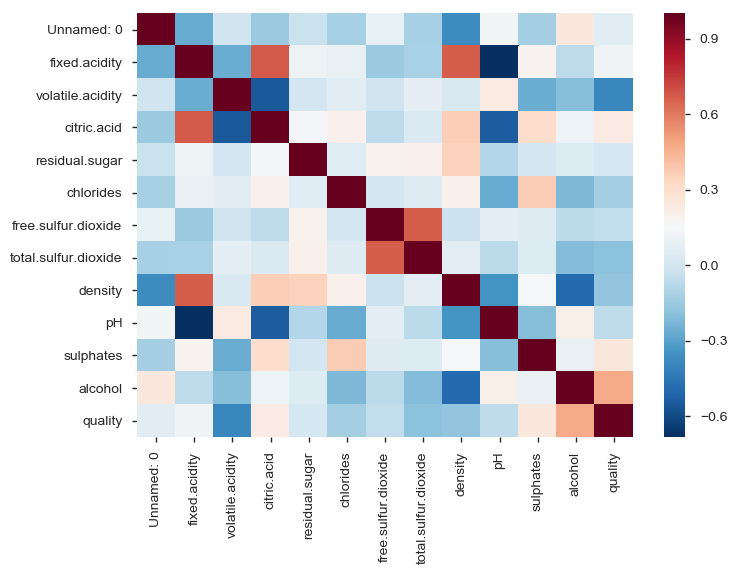

In [94]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap = 'RdBu_r')

Ao analisar a correlação das colunas entre si, pode-se preceber que existem apenas três correlações acima de 0.6, que são: Acidez Fixa com a Densidade, Acidez Fixa com o Ácido Cítrico e o Dióxido Sulfúrico Total com o Dióxido Sulfúrico Livre.

E correlações abaixo de -0.6, que são: Acidez Fixa com o pH, Acidez Volátil com o Ácido Cítrico e Densidade com o Álcool.

Essas correlações eram esperadas, dado que são muito próximas umas das outras. As correlações podem interferir na regressão linear, pois ao se relacionarem, essa regressão deixa de ser 100% útil, já que existe outro tipo de relação, que não a linear.

Caso a Regressão não fique precisa, retirar uma das variáveis que se correlacionam pode vir a resolver o problema.

**Embaralhando o Data Frame para futura análise dos dados:**

In [95]:
df = df.sample(frac=1).reset_index(drop=True)
df.head(3)

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,958,9.5,0.37,0.52,2.0,0.088,12.0,51.0,0.99613,3.29,0.58,11.1,6
1,795,10.1,0.27,0.54,2.3,0.065,7.0,26.0,0.99531,3.17,0.53,12.5,6
2,1480,8.2,0.28,0.60,3.0,0.104,10.0,22.0,0.99828,3.39,0.68,10.6,5


In [96]:
treinamento = df[:1280]
teste = df[1280:]

In [97]:
X = treinamento[['fixed.acidity', 'volatile.acidity', 'citric.acid',
       'residual.sugar', 'chlorides', 'free.sulfur.dioxide',
       'total.sulfur.dioxide', 'density', 'pH', 'sulphates', 'alcohol']]

Y = treinamento['quality']

In [98]:
Xc = sm.add_constant(X)
model = sm.OLS(Y,Xc)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     67.58
Date:                Thu, 08 Nov 2018   Prob (F-statistic):          8.40e-119
Time:                        08:38:40   Log-Likelihood:                -1255.0
No. Observations:                1280   AIC:                             2534.
Df Residuals:                    1268   BIC:                             2596.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   17.9479     24.005      0.748      0.455     -29.145      65.041
fixed.acidity            0.0394      0.030      1.326      0.185      -0.019       0.098
volatile.acidity        -1.0396      0.138     -7.523      0.000      -1.311      -0.769
citric.acid             -0.1754      0.171     -1.027      0.305      -0.510       0.160
residual.sugar           0.0154      0.017      0.915      0.360      -0.018       0.048
chlorides               -1.9138      0.489     -3.912      0.000      -2.874      -0.954
free.sulfur.dioxide      0.0060      0.002      2.477      0.013       0.001       0.011
total.sulfur.dioxide    -0.0032      0.001     -3.889      0.000      -0.005      -0.002
density                -14.3420     24.509     -0.585      0.559     -62.424      33.740
pH                      -0.3708      0.214     -1.730      0.084      -0.791       0.050
sulphates                1.0069      0.127      7.921      0.000       0.757       1.256
alcohol                  0.2879      0.030      9.665      0.000       0.229       0.346
==============================================================================
Omnibus:                       29.657   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.217
Skew:                          -0.233   Prob(JB):                     4.13e-10
Kurtosis:                       3.771   Cond. No.                     1.15e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [99]:
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     8886.
Date:                Thu, 08 Nov 2018   Prob (F-statistic):               0.00
Time:                        08:38:40   Log-Likelihood:                -1255.2
No. Observations:                1280   AIC:                             2532.
Df Residuals:                    1269   BIC:                             2589.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
fixed.acidity            0.0222      0.019      1.180      0.238      -0.015       0.059
volatile.acidity        -1.0547      0.137     -7.716      0.000      -1.323      -0.787
citric.acid             -0.1788      0.171     -1.048      0.295      -0.514       0.156
residual.sugar           0.0079      0.014      0.585      0.558      -0.019       0.034
chlorides               -1.9283      0.489     -3.945      0.000      -2.887      -0.969
free.sulfur.dioxide      0.0061      0.002      2.552      0.011       0.001       0.011
total.sulfur.dioxide    -0.0032      0.001     -3.960      0.000      -0.005      -0.002
density                  3.9751      0.699      5.690      0.000       2.605       5.346
pH                      -0.4606      0.177     -2.595      0.010      -0.809      -0.112
sulphates                0.9827      0.123      7.995      0.000       0.742       1.224
alcohol                  0.3048      0.019     15.647      0.000       0.267       0.343
==============================================================================
Omnibus:                       28.579   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.361
Skew:                          -0.227   Prob(JB):                     1.04e-09
Kurtosis:                       3.754   Cond. No.                     2.48e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.48e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [100]:
X_alt = treinamento[['volatile.acidity', 'chlorides', 'total.sulfur.dioxide', 'density', 'pH', 'sulphates', 'alcohol']]

model = sm.OLS(Y,X_alt)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 1.390e+04
Date:                Thu, 08 Nov 2018   Prob (F-statistic):               0.00
Time:                        08:38:40   Log-Likelihood:                -1260.1
No. Observations:                1280   AIC:                             2534.
Df Residuals:                    1273   BIC:                             2570.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
volatile.acidity        -1.0113      0.112     -8.996      0.000      -1.232      -0.791
chlorides               -2.1187      0.464     -4.569      0.000      -3.029      -1.209
total.sulfur.dioxide    -0.0021      0.001     -3.675      0.000      -0.003      -0.001
density                  4.2918      0.443      9.681      0.000       3.422       5.161
pH                      -0.4933      0.129     -3.814      0.000      -0.747      -0.240
sulphates                0.9898      0.122      8.092      0.000       0.750       1.230
alcohol                  0.3031      0.019     16.024      0.000       0.266       0.340
==============================================================================
Omnibus:                       26.863   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.238
Skew:                          -0.229   Prob(JB):                     8.20e-09
Kurtosis:                       3.699   Cond. No.                     1.65e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [102]:
previsao = B1*teste['fixed.acidity']+B2*teste['volatile.acidity']+B3*teste['citric.acid']+B4*teste['residual.sugar']+\
                B5*teste['chlorides']+B6*teste['free.sulfur.dioxide']+B7*teste['total.sulfur.dioxide']+\
                B8*teste['density']+B9*teste['pH']+B10*teste['sulphates']+B11*teste['alcohol']
        
teste['Previsão'] = previsao.round(0)
teste

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,Previsão
1280,1021,11.3,0.360,0.66,2.4,0.123,3.0,8.0,0.99642,3.20,0.53,11.9,6,6.0
1281,849,6.4,0.640,0.21,1.8,0.081,14.0,31.0,0.99689,3.59,0.66,9.8,5,5.0
1282,498,7.2,0.340,0.32,2.5,0.090,43.0,113.0,0.99660,3.32,0.79,11.1,5,6.0
1283,154,7.5,0.600,0.03,1.8,0.095,25.0,99.0,0.99500,3.35,0.54,10.1,5,5.0
1284,1192,6.5,0.885,0.00,2.3,0.166,6.0,12.0,0.99551,3.56,0.51,10.8,5,5.0
1285,24,8.5,0.490,0.11,2.3,0.084,9.0,67.0,0.99680,3.17,0.53,9.4,5,5.0
1286,472,9.6,0.540,0.42,2.4,0.081,25.0,52.0,0.99700,3.20,0.71,11.4,6,6.0
1287,1279,8.0,0.715,0.22,2.3,0.075,13.0,81.0,0.99688,3.24,0.54,9.5,6,5.0
1288,1599,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6,6.0
1289,250,7.3,0.660,0.00,2.0,0.084,6.0,23.0,0.99830,3.61,0.96,9.9,6,5.0


In [103]:
acertos = 0
erros = 0
for i in range(len(teste)):
    if teste['quality'][i] == teste.['Previsão'][i]:
        acertos += 1
    else:
        erros += 1

print('Acurácia: {0:.2f}'.format((acertos/len(teste))*100))

SyntaxError: invalid syntax (<ipython-input-103-11d7367c58c5>, line 4)